# Systems of ODEs with SciPy
<br>**Enrico Borriello**</br>
<br>School of Complex Adaptive System</br>
<br>Arizona State University</br>
<br></br>
<br>**Latest update:** Sept 7, 2021</br>

In this notebook we will show how to use the python library SciPy to solve a system of 1st order, ordinary differential equations (ODEs) in its normal form, namely a system of equations in the form

$ \frac{dx_1}{dt}=f_1(x_1,x_2,\dots,x_n,t) $

$ \frac{dx_2}{dt}=f_2(x_1,x_2,\dots,x_n,t) $

$ \dots $

$ \frac{dx_n}{dt}=f_n(x_1,x_2,\dots,x_n,t) $

We will use the SciPy **integrate** module and the SIR model for the spread of a contagious disease as our example.

## The SIR model for the spread of a contagious disease

The SIR model is the most famous, and a very simplified model for the spread of a contagious desease. The model takes its name from the three "compartments" it uses to separate the members of a fixed-size population. Its variables are the sizes of these subgroups:

$S(t) = $ number of **susceptibe** individuals;

$I(t) = $ number of **infected** individuals;

$R(t) = $ number of **recovered** individuals.

The model is based on very simple assumptions:

1) The rate at which susceptibe individuals get infected is proportional to both the number of susceptible individuals, $S(t)$, and the number of infected individual, $I(t)$. The speed of the processes is determined by an empirical parameter $c$, called contact (or transmission) rate.

2) The rate at which infected individuals recover is simply proportional to this number of $I(t)$. The speed of the processes is determined by a second empirical parameter, the recovery rate $r$.

The process can be described by the following diagram:

<img src="figures/M3_fig1.png" width= "400">

The model assumes a one-way dynamics with no feedback. Over time the entire population becomes infected, and eventually recovers. 

These assumptions translate into this system of ODEs:

$\frac{dS}{dt} = -cSI $

$\frac{dI}{dt} = cSI -rI $

$\frac{dR}{dt} = rI $

That we want to solve for given initial values of the three variables, $S(0)$, $I(0)$, and $R(0)$.

## Code

In [6]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# parameters
contact_rate = 0.003
recovery_rate = 0.3

In [8]:
# initial conditions
# total population size = 1000
S0 = 999
I0 = 1
R0 = 0
x0 = [S0,I0,R0]

In [9]:
# ODEs
def odes(x,t):
    S = x[0]
    I = x[1]
    R = x[2]
    dSdt = -contact_rate*I*S
    dIdt = contact_rate*I*S -recovery_rate*I
    dRdt = recovery_rate*I
    return [dSdt,dIdt,dRdt]

In [10]:
t = np.linspace(0,30,1000)

In [11]:
x = odeint(odes,x0,t)

In [12]:
S = x[:,0]
I = x[:,1]
R = x[:,2]

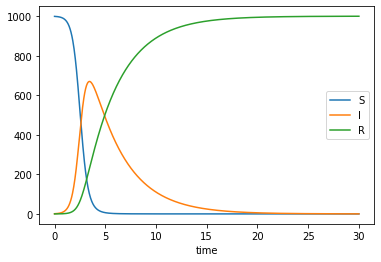

In [16]:
plt.plot(t,S,label='S')
plt.plot(t,I,label='I')
plt.plot(t,R,label='R')
plt.legend()
plt.xlabel('time')
#plt.savefig('SIR_solution.pdf')
plt.show()